In [1]:
import os, glob, math, operator
import ROOT as ROOT
from ROOT import TCanvas, TColor, TGaxis, TH1F, TPad, TFile, TGraphAsymmErrors,TLatex,TLine,gStyle,TLegend,gROOT,TGraph
from ROOT import kBlack, kBlue, kRed
from array import array
import matplotlib.pyplot as plt, numpy as np
from matplotlib import text
from matplotlib.colors import LogNorm
import datetime
import pandas as pd 

def SetCanvas():
    c = TCanvas("myCanvasName","The Canvas Title",650,600)
    c.SetBottomMargin(0.100)
    c.SetRightMargin(0.020)
    c.SetLeftMargin(0.150)
    c.SetTopMargin(0.080)
    return c

def SetCMSAxis(h, xoffset=1., yoffset=1.):
    h.GetXaxis().SetTitleSize(0.047)
    h.GetYaxis().SetTitleSize(0.047)

    print (type(h))
    if type(h) is ( (not ROOT.TGraphAsymmErrors) or (not ROOT.TGraph)):
        h.GetZaxis().SetTitleSize(0.047)

    h.GetXaxis().SetLabelSize(0.047)
    h.GetYaxis().SetLabelSize(0.047)
    if type(h) is ( (not ROOT.TGraphAsymmErrors) or (not ROOT.TGraph)):
        h.GetZaxis().SetLabelSize(0.047)

    h.GetXaxis().SetTitleOffset(xoffset)
    h.GetYaxis().SetTitleOffset(yoffset)
    return h

def SetLegend(coordinate_=[.50,.65,.90,.90],ncol=2):
    c_=coordinate_
    legend=ROOT.TLegend(c_[0], c_[1],c_[2],c_[3])
    legend.SetBorderSize(0)
    legend.SetNColumns(ncol)
    legend.SetLineColor(1)
    legend.SetLineStyle(1)
    legend.SetLineWidth(1)
    legend.SetFillColor(0)
    legend.SetFillStyle(0)
    legend.SetTextFont(42)
    legend.SetTextSize(0.035)
    return legend


def drawenergy1D(is2017, text_="Work in progress 2018", data=True):
    #pt = ROOT.TPaveText(0.0877181,0.9,0.9580537,0.96,"brNDC")
    pt = ROOT.TPaveText(0.0997181,0.95,0.9580537,0.96,"brNDC")
    pt.SetBorderSize(0)
    pt.SetTextAlign(12)
    pt.SetFillStyle(0)
    pt.SetTextFont(52)

    cmstextSize = 0.07
    preliminarytextfize = cmstextSize * 0.7
    lumitextsize = cmstextSize *0.7
    pt.SetTextSize(cmstextSize)
    text = pt.AddText(0.03,0.57,"#font[60]{CMS}")

    #pt1 = ROOT.TPaveText(0.0877181,0.9,0.9580537,0.96,"brNDC")
    pt1 = ROOT.TPaveText(0.0877181,0.95,0.9580537,0.96,"brNDC")
    pt1.SetBorderSize(0)
    pt1.SetTextAlign(12)
    pt1.SetFillStyle(0)
    pt1.SetTextFont(52)

    pt1.SetTextSize(preliminarytextfize)
    #text1 = pt1.AddText(0.215,0.4,text_)
    text1 = pt1.AddText(0.15,0.4,text_)

    #pt2 = ROOT.TPaveText(0.0877181,0.9,0.9580537,0.96,"brNDC")
    pt2 = ROOT.TPaveText(0.0997181,0.95,0.9580537,0.96,"brNDC")
    pt2.SetBorderSize(0)
    pt2.SetTextAlign(12)
    pt2.SetFillStyle(0)
    pt2.SetTextFont(52)
    pt2.SetTextFont(42)
    pt2.SetTextSize(lumitextsize)

    pavetext = ''
    if is2017 and data: pavetext = str(luminosity_)+' fb^{-1}'+" (13 TeV)"
    if (not is2017) and data: pavetext = str(luminosity_)+' fb^{-1}'+"(13 TeV)"

    if is2017 and not data: pavetext = "13 TeV"
    if (not is2017) and not data: pavetext = "13 TeV"

    if data: text3 = pt2.AddText(0.68,0.5,pavetext)
    if not data: text3 = pt2.AddText(0.85,0.5,pavetext)

    return [pt,pt1,pt2]

def getLatex():
    latex =  TLatex()
    latex.SetNDC();
    latex.SetTextSize(0.04);
    latex.SetTextAlign(31);
    latex.SetTextAlign(11);
    latex.SetTextColor(1);
    return latex


def getGraph(n,x,y,lc,mc,ms):
    gr =TGraph(n,x,y)
    gr.SetFillColor(4)
    #gr.SetFillStyle(3004)
    gr.SetLineColor(4)
    gr.SetLineWidth(2)
    gr.SetMarkerStyle(ms)
    gr.SetMarkerSize(1.5)
    gr.SetLineColor(lc)
    gr.SetLineWidth(1)
    gr.SetMarkerColor(mc)
    gr.GetYaxis().SetTitle("Signal Efficiency")
    gr.GetXaxis().SetTitle("M_{a} (GeV)")
#     gr.SetTitle("") 
    return gr
    


Welcome to JupyROOT 6.22/08


In [2]:
datestr = str(datetime.date.today().strftime("%d%m%Y"))
luminosity_ = '{0:.2f}'.format(35.82)

In [15]:
gStyle.SetErrorX(0.5)
gStyle.SetFrameLineWidth(3)
gStyle.SetOptTitle(0)
gStyle.SetOptStat(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetFillColor(2)
gStyle.SetLineWidth(1)
gStyle.SetHistFillStyle(2)
gROOT.SetBatch(True)
sig_plots = {}

# xsec_scan = pd.read_csv('/Users/ptiwari/Downloads/Document/tanbeta_vs_ma_scan_mA_1200_fixed.csv',sep=",",) 
# xsec_scan = xsec_scan[1:]
# tanb = [1,10,20,25,30,35,40,45,50]

# for beta in tanb:
#     loc_dict = {}
#     for i in range(len(xsec_scan.query('tanbeta == '+str(beta))['ma'])):
#         loc_dict.update({xsec_scan.query('tanbeta == '+str(beta))['ma'].iloc[i]:xsec_scan.query('tanbeta == '+str(beta))['xsec'].iloc[i]})
#     sig_plots.update({'tan#beta_=_'+str(beta):loc_dict})
    
########for 150GeV##########
# dict_Xsec_1200={1000: 0.001418, 100: 0.465, 10: 1.559, 150: 0.2947, 200: 0.1889, 250: 0.1229, 300: 0.08189, 350: 0.05524, 400: 0.03817, 450: 0.02674, 500: 0.0189, 50: 0.695, 700: 0.00569, 750: 0.004344}
# dict_Xsec_600 = {100: 0.4683, 10: 1.565, 150: 0.2997, 200: 0.1971, 250: 0.1314, 300: 0.09002, 350: 0.06368, 400: 0.04677, 450: 0.03591, 500: 0.02736}
#######for no Cut##########
# dict_Xsec_1200_16= {1000: 0.004647, 10: 431.4, 150: 5.738, 200: 2.595, 250: 1.314, 350: 0.4159, 400: 0.2519, 450: 0.159, 500: 0.1031, 50: 55.39, 700: 0.0236, 750: 0.01712}
# dict_Xsec_600_16 = {100: 14.85, 10: 433.4, 150: 5.746, 200: 2.639, 250: 1.345, 300: 0.7479, 350: 0.4489, 400: 0.2899, 450: 0.1983, 500: 0.1394, 50: 55.71}
dict_Xsec_1200_16= {1000: 0.0000137,100: 0.0207200,200: 0.0057280,300:	0.0020810,350:	0.0012370,400:	0.0005773,500:	0.0002802,50: 0.0376900,750:0.0000472}
dict_Xsec_600_16 = {10: 0.01208000,50:0.00710200,100:0.00446900,150:0.00298100,200:0.00186400,250:0.00113800,300:0.00079840,350:0.00039440,400:0.00019620,450:0.00011120,500:0.00008467,700:0.00002900,750:0.00002412,1000:0.00000660}

dict_Xsec_1200_17 = {400: 0.03663, 10: 0.9053, 100: 0.4096, 1000: 0.001415, 150: 0.2694, 200: 0.1733, 250: 0.1163, 300: 0.07677, 350: 0.05271, 450: 0.0266, 50: 0.6248, 500: 0.01897, 700: 0.00575, 750: 0.004376}
dict_Xsec_600_17 = {10: 0.9112, 100: 0.4232, 150: 0.2828, 200: 0.188, 250: 0.1255, 300: 0.08584, 350: 0.06183, 400: 0.04522, 450: 0.03421, 50: 0.6252, 500: 0.02579}

dict_Xsec_1200_18 = {10: 0.9018, 100: 0.4139, 1000: 0.001411, 150: 0.2674, 200: 0.1739, 250: 0.1159, 300: 0.07691, 350: 0.05272, 400: 0.03691, 450: 0.02631, 50: 0.6207, 500: 0.01894, 700: 0.005757, 750: 0.004415}
dict_Xsec_600_18 = {10: 0.9124, 100: 0.421, 150: 0.2869, 200: 0.1886, 250: 0.1266, 300: 0.08627, 350: 0.06118, 400: 0.04518, 450: 0.03419, 50: 0.6275, 500: 0.02596}

sig_plots.update({"2016_MA_1200_(GeV)":dict_Xsec_1200_16})
sig_plots.update({"2016_MA_600_(GeV)":dict_Xsec_600_16})
# sig_plots.update({"2017_MA_1200_(GeV)":dict_Xsec_1200_17})
# sig_plots.update({"2017_MA_600_(GeV)":dict_Xsec_600_17})
# sig_plots.update({"2018_MA_1200_(GeV)":dict_Xsec_1200_18})
# sig_plots.update({"2018_MA_600_(GeV)":dict_Xsec_600_18})
########for 150GeV##########

print(sig_plots)

{'2016_MA_1200_(GeV)': {1000: 1.37e-05, 100: 0.02072, 200: 0.005728, 300: 0.002081, 350: 0.001237, 400: 0.0005773, 500: 0.0002802, 50: 0.03769, 750: 4.72e-05}, '2016_MA_600_(GeV)': {10: 0.01208, 50: 0.007102, 100: 0.004469, 150: 0.002981, 200: 0.001864, 250: 0.001138, 300: 0.0007984, 350: 0.0003944, 400: 0.0001962, 450: 0.0001112, 500: 8.467e-05, 700: 2.9e-05, 750: 2.412e-05, 1000: 6.6e-06}}


<class cppyy.gbl.TGraph at 0x7fc7eadd95e0>
0.05793143255491027
<class cppyy.gbl.TGraph at 0x7fc7eadd95e0>
0.01208
<class cppyy.gbl.TMultiGraph at 0x7fc7f1585bb0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName
Info in <TCanvas::Print>: pdf file xSection_DMSimp_18062021.pdf has been created
Info in <TCanvas::Print>: png file xSection_DMSimp_18062021.png has been created


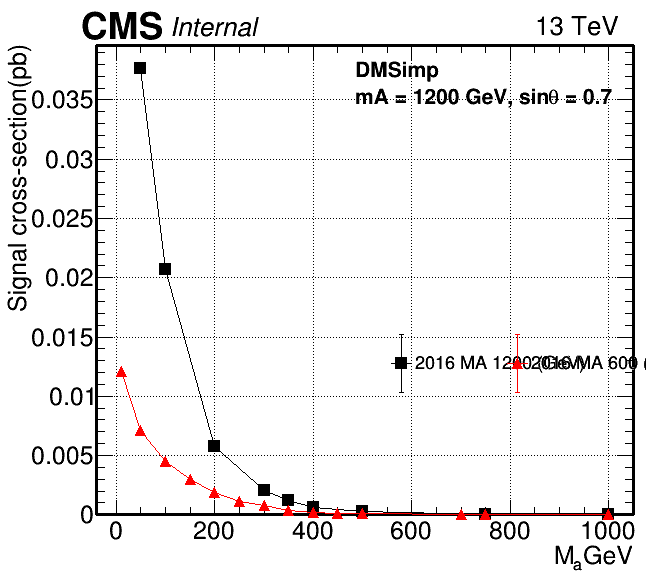

In [16]:
c1 = SetCanvas()
c1.SetTickx()
c1.SetTicky()
c1.SetGridx()
c1.SetGridy()
c1.SetLogy(0)
c1.cd()
#legend = SetLegend([.65,.45,.85,.80],ncol=1)
legend = SetLegend([.60,.28,.95,.45],ncol=2)
fst_ele = 1
all_graph = ROOT.TMultiGraph()
for key in sig_plots: 
    sig_eff_sorted = sorted(sig_plots[key].items(), key=operator.itemgetter(0))
    x12, y12 = zip(*sig_eff_sorted)
    x12 = array('d',x12)
    y12 = array('d',y12)
    gr12 = getGraph(len(x12),x12,y12,fst_ele,fst_ele,20+fst_ele)
    gr12 = SetCMSAxis(gr12,1,1.6)
    print(gr12.Eval(10,0, "S"))
    all_graph.Add(gr12)
    legend.AddEntry(gr12,str(key).replace('_',' '),"PEL")
    fst_ele+=1
all_graph.Draw("ALP")
legend.Draw('p same')
# all_graph.SetTitle(";M_{a}GeV;Signal Efficiency(%)");
all_graph.SetTitle(";M_{a}GeV;Signal cross-section(pb)");
all_graph= SetCMSAxis(all_graph,1,1.6)
pt = drawenergy1D(True,text_="    Internal",data=False)
for ipt in pt: ipt.Draw()
latex=getLatex()
# latex.DrawLatex(0.55, 0.84,'#splitline{2HDM+a model}{mA = 1200 GeV, sin#theta = 0.7}')
latex.DrawLatex(0.55, 0.84,'#splitline{DMSimp}{mA = 1200 GeV, sin#theta = 0.7}')
c1.Modified()
# all_graph.GetXaxis().SetLimits(1,500)
# c1.Update()
c1.Draw()

c1.SaveAs('xSection_DMSimp_'+datestr+'.pdf')
c1.SaveAs('xSection_DMSimp_'+datestr+'.png')
#c1.Close()